In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

import emg_support_functions as e_sp 

In [2]:
emg_setup_columns = [""]*42

# first 12 pulses were given at 100% of RMT
for pulse_number in range(12):
    emg_setup_columns[pulse_number] = 'RMT100_t'+ str(pulse_number)

# 6 next pulses were given at 110% of RMT
for pulse_number in range(12,18):
    emg_setup_columns[pulse_number] = 'RMT110_t'+ str(pulse_number-12)

# 6 next pulses were given at 120% of RMT
for pulse_number in range(18,24):
    emg_setup_columns[pulse_number] = 'RMT120_t'+ str(pulse_number-18)

# 6 next pulses were given at 130% of RMT
for pulse_number in range(24,30):
    emg_setup_columns[pulse_number] = 'RMT130_t'+ str(pulse_number-24)

# 6 next pulses were given at 140% of RMT
for pulse_number in range(30,36):
    emg_setup_columns[pulse_number] = 'RMT140_t'+ str(pulse_number-30)

# 6 next pulses were given at 150% of RMT
for pulse_number in range(36,42):
    emg_setup_columns[pulse_number] = 'RMT150_t'+ str(pulse_number-36)

In [3]:
#load data recorded from a single subject
df_s1 = pd.read_csv('s1.csv',header=None)
df_s1.columns = emg_setup_columns


In [4]:
#Correct data so that the mean baseline noise is around zero
df_reduced_mean = pd.DataFrame()
for i in df_s1.columns:
    df_reduced_mean[i] = df_s1[i]-(np.mean(df_s1[i].loc[0:100]))


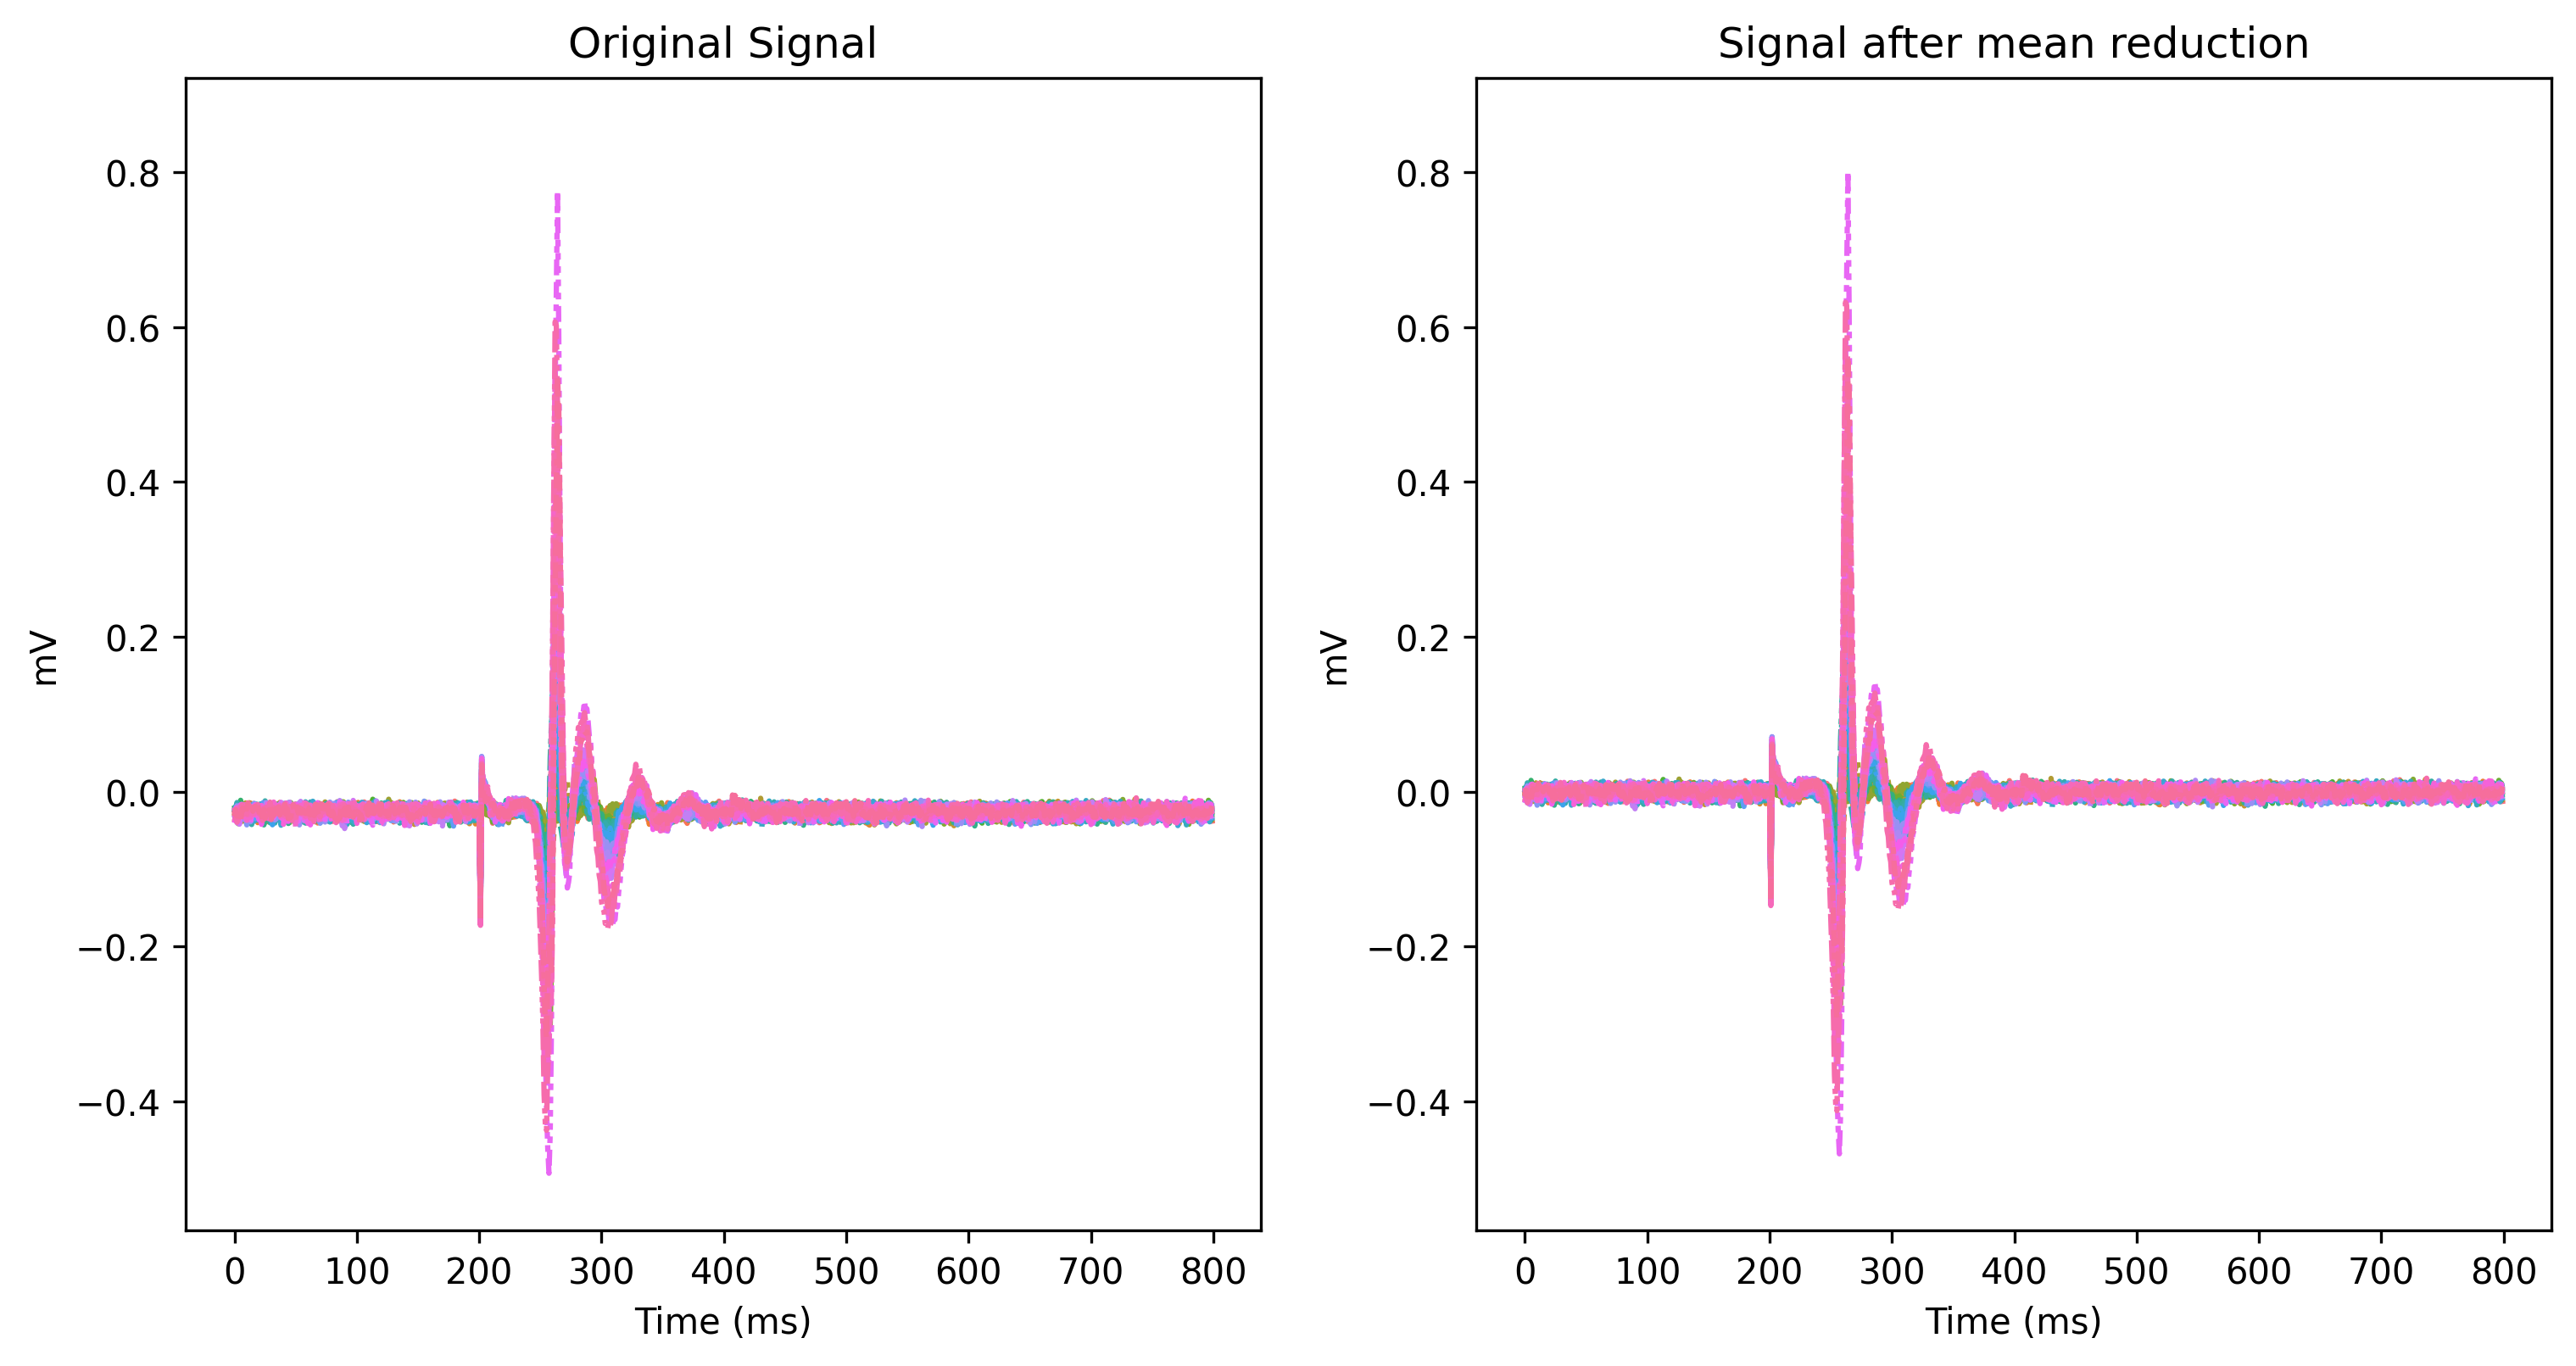

In [5]:
# Plot all EMG recordings, raw data (left) along the data after mean reduction
e_sp.plot_pre_post_filtering(df_s1, df_reduced_mean)

<br><br>Each TMS stimulation resulted in one EMG recording of a fixed length. 
<br><br>
See analysis in the figure below:<br>
TMS pulse is detected (marked as a solid vertical black line in the figure below), and the MEP signal is expected to occur within the following window of time (shaded area)

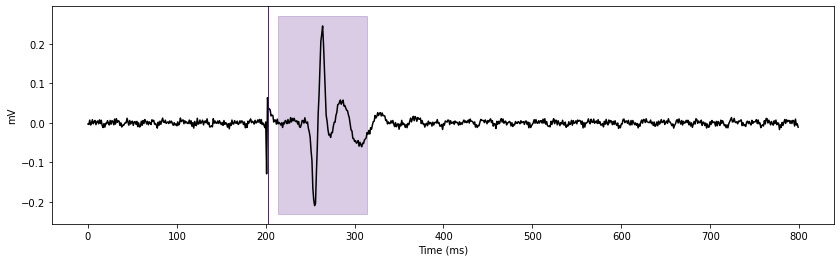

In [6]:
e_sp.draw_detected(df_reduced_mean['RMT130_t0'])

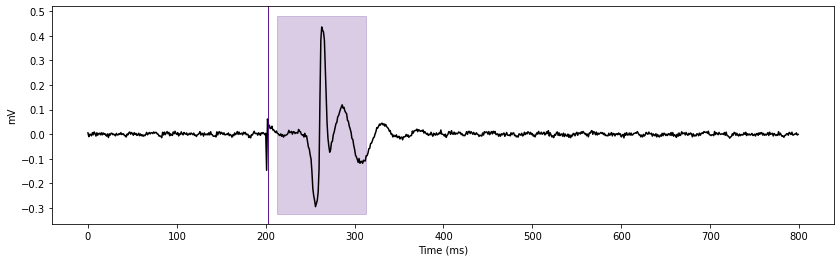

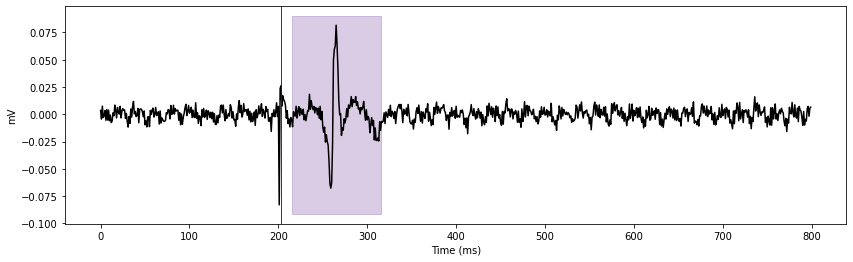

In [7]:
# more examples:

e_sp.draw_detected(df_reduced_mean['RMT150_t3'])
e_sp.draw_detected(df_reduced_mean['RMT100_t5'])
# bottom figure looks more noisy since the MEP amplitude is smaller (see y-axis range)

A common analysis of MEP is plotting a recruitment curve, showing the mean amplitude of peak to peak MEP at each stimulaiton intensity (see https://www.sciencedirect.com/science/article/pii/S1388245701005235). <br>X-axis represents intensities relative to each participant's RMT (resting motor threshold)

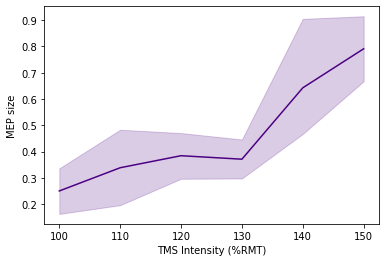

In [6]:
rc_values = e_sp.plot_recruitment_curve(df_reduced_mean)